In [ ]:
import os
import ROOT
from itertools import product

: 

In [2]:
MEASURE = "ele"        # ele / mu
ERA     = "2016a"
POGBASE = "/Users/choij/workspace/Materials/TagAndProbe"
TNPBASE = f"{os.getcwd()}/../results"

In [3]:
# bins
if MEASURE == "mu":
    etabin = [0., 0.9, 1.2, 2.1, 2.4]
    ptbin = [15, 20, 25, 30, 40, 50, 60, 120]
elif MEASURE == "ele" and ERA == "2016b":
    etabin = [-2.5, -2., -1.566, -1.4442, -0.8, 0., 0.8, 1.4442, 1.566, 2., 2.5]
    ptbin = [10., 20., 35., 50., 100., 500.]
else:
    etabin = [-2.5, -2., -1.566, -1.4442, -0.8, 0., 0.8, 1.4442, 1.566, 2., 2.5] 
    ptbin = [10., 20., 35., 50., 100., 200., 500.]

In [4]:
# make file map for each era
POGMAP_ele = {
    "2016a": f"{POGBASE}/Electron/egammaEffi.txt_Ele_wp90noiso_preVFP_EGM2D.root",
    "2016b": f"{POGBASE}/Electron/egammaEffi.txt_Ele_wp90noiso_postVFP_EGM2D.root",
    "2017": f"{POGBASE}/Electron/egammaEffi.txt_EGM2D_MVA90noIso_UL17.root",
    "2018": f"{POGBASE}/Electron/2018_ElectronMVA90noiso.root"
}
POGMAP_mu = {
    "2016a": f"{POGBASE}/Muon/Efficiencies_muon_generalTracks_Z_Run2016_UL_HIPM_ID.root",
    "2016b": f"{POGBASE}/Muon/Efficiencies_muon_generalTracks_Z_Run2016_UL_ID.root",
    "2017": f"{POGBASE}/Muon/Efficiencies_muon_generalTracks_Z_Run2017_UL_ID.root",
    "2018": f"{POGBASE}/Muon/Efficiencies_muon_generalTracks_Z_Run2018_UL_ID.root"
}

if MEASURE == "ele":
    POGMAP = POGMAP_ele
elif MEASURE == "mu":
    POGMAP = POGMAP_mu
else:
    print(f"wrong measure {MEASURE}")
    raise(KeyError)

def tnppath(measure, era):
    if measure == "ele":
        filepath = f"{TNPBASE}/POGElectron_V3/POGMVANoIsoWP90_{era}/efficiency.root"
    elif measure == "mu":
        filepath = f"{TNPBASE}/POGMuon_V0/NUM_POGMedium_DEN_TrackerMuons_{era}/efficiency.root"
    else:
        print("measure should be ele or mu")
        raise(KeyError)
    assert os.path.exists(filepath)
    
    return filepath

In [5]:
# get root file
f_pog = ROOT.TFile.Open(POGMAP[ERA])
f_tnp = ROOT.TFile.Open(tnppath(MEASURE, ERA))

In [6]:
# get histogram for estimation
def get_hist(measure, era, is_data, is_pog):
    meas_map = {
        "ele_data": "EGamma_EffData2D",
        "ele_mc": "EGamma_EffMC2D"
    }
    
    if is_pog:
        f = ROOT.TFile.Open(POGMAP[era])
        if measure == "ele" and is_data:
            h = f.Get("EGamma_EffData2D")
        elif measure == "ele" and not is_data:
            h = f.Get("EGamma_EffMC2D")
        elif measure == "mu" and is_data:
            pass
        elif measure == "mu" and not is_data:
            pass
        else:
            raise(KeyError)
    else:
        f = ROOT.TFile.Open(tnppath(measure, era))
        if is_data:
            h = f.Get("data")
        else:
            h = f.Get("sim")
    h.SetDirectory(0)
    f.Close()
    return h

In [7]:
h_pog = get_hist(MEASURE, ERA, is_data=True, is_pog=True)
h_tnp = get_hist(MEASURE, ERA, is_data=True, is_pog=False)

In [8]:
for bin, (pt, eta) in enumerate(product(ptbin[:-1], etabin[:-1])):
    eta, pt = eta+0.01, pt+0.01
    thisbin = h_pog.FindBin(eta, pt)
    eff_pog = h_pog.GetBinContent(thisbin)
    eff_tnp = h_tnp.GetBinContent(thisbin)
    print(f"[bin {bin} ]\t{eff_pog:.4f}\t{eff_tnp:.4f}\t{(eff_tnp-eff_pog)/eff_pog*100:.2f}%")

[bin 0 ]	0.7480	0.7492	0.16%
[bin 1 ]	0.7680	0.7664	-0.21%
[bin 2 ]	1.0000	0.7679	-23.21%
[bin 3 ]	0.7930	0.7931	0.01%
[bin 4 ]	0.7670	0.7641	-0.38%
[bin 5 ]	0.7860	0.8029	2.15%
[bin 6 ]	0.7930	0.7916	-0.17%
[bin 7 ]	1.0000	0.7825	-21.75%
[bin 8 ]	0.7650	0.7644	-0.08%
[bin 9 ]	0.7540	0.7545	0.07%
[bin 10 ]	0.7860	0.7856	-0.05%
[bin 11 ]	0.7880	0.7872	-0.10%
[bin 12 ]	1.0000	0.7264	-27.36%
[bin 13 ]	0.7910	0.7917	0.08%
[bin 14 ]	0.8000	0.8025	0.31%
[bin 15 ]	0.8220	0.8218	-0.02%
[bin 16 ]	0.7980	0.7971	-0.11%
[bin 17 ]	1.0000	0.7151	-28.49%
[bin 18 ]	0.7790	0.7825	0.45%
[bin 19 ]	0.7730	0.7749	0.25%
[bin 20 ]	0.8390	0.8390	0.00%
[bin 21 ]	0.8520	0.8510	-0.12%
[bin 22 ]	1.0000	0.8192	-18.08%
[bin 23 ]	0.8470	0.8474	0.05%
[bin 24 ]	0.8460	0.8467	0.09%
[bin 25 ]	0.8610	0.8610	-0.00%
[bin 26 ]	0.8520	0.8522	0.02%
[bin 27 ]	1.0000	0.8145	-18.55%
[bin 28 ]	0.8530	0.8528	-0.03%
[bin 29 ]	0.8300	0.8311	0.13%
[bin 30 ]	0.8510	0.8564	0.63%
[bin 31 ]	0.8860	0.8883	0.26%
[bin 32 ]	1.0000	0.8324	-16

In [12]:
# projection
h_projy_pog = h_pog.ProjectionY(f"projy_pog", 2, 2)
h_projy_tnp = h_tnp.ProjectionY(f"projy_tnp", 2, 2)

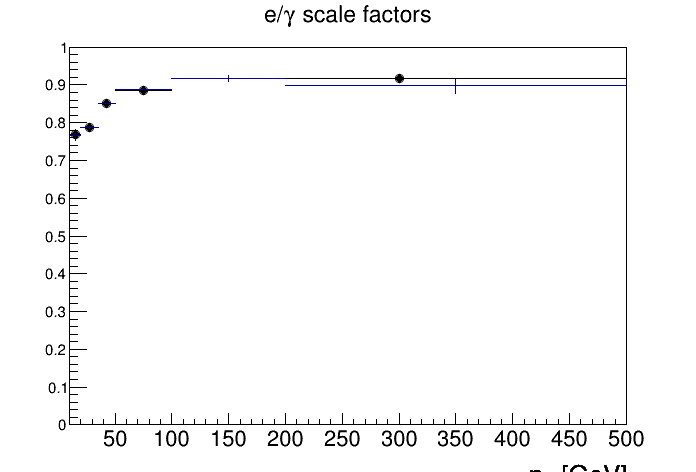

In [13]:
h_projy_pog.SetStats(0)
h_projy_pog.GetYaxis().SetRangeUser(0., 1.)

c = ROOT.TCanvas()
h_projy_pog.Draw()
h_projy_tnp.Draw("same")
c.Draw()

Error in <TH1D::Add>: Attempt to add histograms with different number of bins : nbins h1 = 6 , nbins h2 =  5
Error in <TH1D::Divide>: Cannot divide histograms with different number of bins


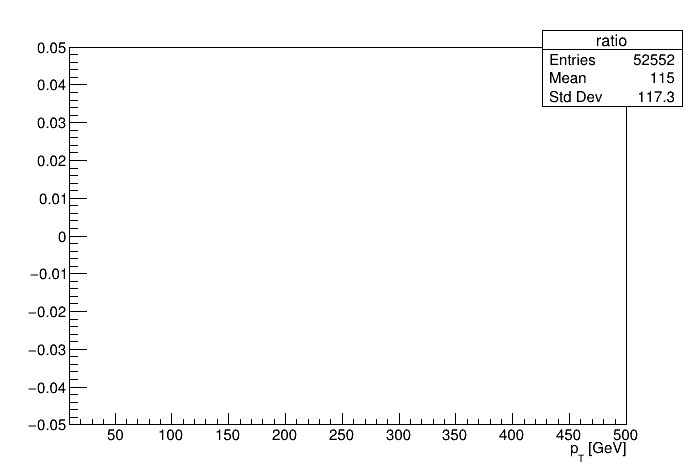

In [14]:
# make ratio plots
h_ratio = h_projy_tnp.Clone("ratio")
h_ratio.Add(h_projy_pog, -1)
h_ratio.Divide(h_projy_pog)
h_ratio.GetYaxis().SetRangeUser(-0.05, 0.05)

c = ROOT.TCanvas()
h_ratio.Draw()
c.Draw()